In [1]:
!pip install torch torchvision
!pip install opencv-python
!pip install torchvision
!pip install facenet_pytorch

In [2]:
import cv2
import torch
from facenet_pytorch import MTCNN
from PIL import Image
import numpy as np

In [11]:
def blur_face(image, box, blur_strength=41):
    x1, y1, x2, y2 = box
    face_region = image[y1:y2, x1:x2]
    face_region = cv2.GaussianBlur(face_region, (blur_strength, blur_strength), 0)
    image[y1:y2, x1:x2] = face_region
    return image

In [24]:
def detect_and_blur_faces(image_path, output_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    boxes, _ = mtcnn.detect(image)
    
    if boxes is not None:
        for box in boxes:
            box = box.astype(int)
            image = blur_face(image, box)
    
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    cv2.imwrite(output_path, image)

In [27]:

mtcnn = MTCNN(keep_all=True, device='cpu')

image_path = r'C:\Users\sidor\Downloads\international_dog_day_1692974397743_1692974414085.avif'

output_path = r'C:\Users\sidor\Downloads\blurred_image.jpg'

detect_and_blur_faces(image_path, output_path)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


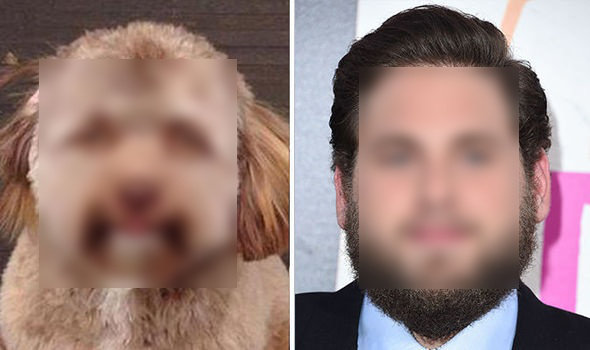

In [22]:
result = Image.open(output_path)
result